In [1]:
import pandas as pd
import seaborn as sns

car_data = pd.read_csv('/content/car_age_price.csv')
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [2]:
# Checking for Null Values
car_data.isnull().sum()

Year     0
Price    0
dtype: int64

In [3]:
#statistical analysis
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
car_data.columns

Index(['Year', 'Price'], dtype='object')

<Axes: xlabel='Year', ylabel='Price'>

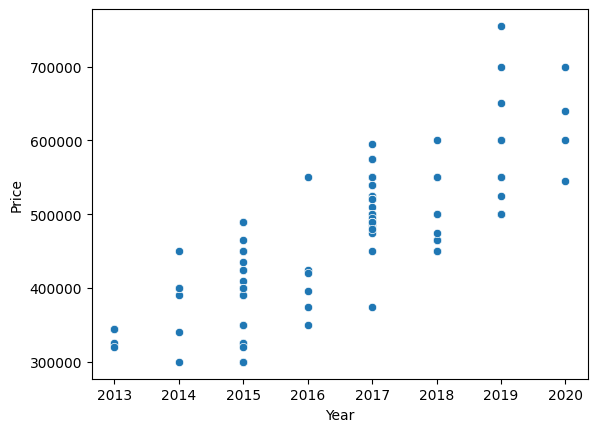

In [5]:
# Understand relationship between Year and Price
sns.scatterplot(x='Year',y='Price',data=car_data)

<Axes: ylabel='Price'>

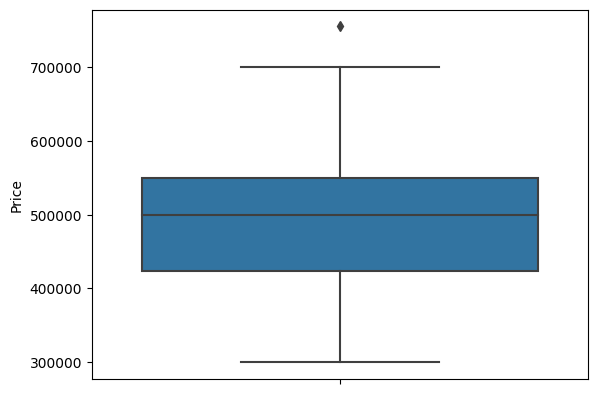

In [6]:
sns.boxplot(y=car_data.Price)

In [8]:
# Create Training and Testing Split

# feature variables in variable X
X = car_data['Year']

# Target variable in Variable y
y = car_data['Price'] #Target Variable

print(X.shape, y.shape)

(112,) (112,)


In [9]:
X.head()

0    2018
1    2019
2    2019
3    2018
4    2018
Name: Year, dtype: int64

In [10]:
y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [11]:
import numpy as np

X= np.array(X)
y = np.array(y)

X = X.reshape(-1,1)
y = y.reshape(-1,1)
y.shape

(112, 1)

In [12]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


In [14]:
# build the Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluate the model

accuracy_lr = lr_model.score(X_test, y_test)
print(accuracy_lr)

0.3675931342589792


In [16]:
linear_predictions = lr_model.predict(X_test)

print(linear_predictions)

[[ 1.28742151]
 [ 0.23888223]
 [ 0.76315187]
 [ 0.76315187]
 [ 0.76315187]
 [-0.80965705]
 [ 0.23888223]
 [ 0.76315187]
 [ 1.28742151]
 [ 1.28742151]
 [-1.85819633]
 [ 0.23888223]
 [-0.80965705]
 [ 1.81169115]
 [ 0.76315187]
 [ 1.28742151]
 [-1.85819633]
 [-0.80965705]
 [ 0.23888223]
 [ 0.23888223]
 [ 0.23888223]
 [ 0.23888223]
 [ 0.23888223]]


In [17]:
# Train & Evaluate Decision Tree

from sklearn.tree import DecisionTreeRegressor

dr_model = DecisionTreeRegressor() #Instantiate an object
dr_model.fit(X_train, y_train)

accuracy_dr = dr_model.score(X_test, y_test)
accuracy_dr

0.47397011720817506

In [18]:
# Train and Evaluate Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object
rf_model.fit(X_train, y_train)

<ipython-input-18-55196a469bfc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=25)

In [19]:
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_rf

0.4688683622397385

Linear Regression: 36.75 %
Decision Tree: 47.39 %
Random Forest: 47.69 %

Therefore, Random Forest is better

In [20]:
year_2022 = np.array([[2022]])
linear_pred_2022 = lr_model.predict(year_2022)[0]

In [21]:
print("Predicted Price for a 2022 model (Linear Regression):", linear_pred_2022)

Predicted Price for a 2022 model (Linear Regression): [1719.84803972]


In [22]:
# Lasso Regression

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [23]:
# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Linear Regression Mean Squared Error:", linear_mse)
print("Lasso Regression Mean Squared Error:", lasso_mse)

Linear Regression Mean Squared Error: 0.52470677333406
Lasso Regression Mean Squared Error: 0.516557776148543


In [24]:
# Predict the price for a 2022 model using both models
year_2022 = np.array([[2022]])
linear_pred_2022 = lr_model.predict(year_2022)[0]
lasso_pred_2022 = lasso_model.predict(year_2022)[0]

print("Predicted Price for a 2022 model (Linear Regression):", linear_pred_2022)
print("Predicted Price for a 2022 model (Lasso Regression):", lasso_pred_2022)

Predicted Price for a 2022 model (Linear Regression): [1719.84803972]
Predicted Price for a 2022 model (Lasso Regression): 1697.9105106939185
